In [1]:
import numpy as np

list1=[8,-1,0]
list2=[1/2,0,4/3]
list3=[-17/2,1,11/3]

u=np.array(list1)
v=np.array(list2)
w=np.array(list3)

#equilibrium u+v+w+p=0

p=-(u+v+w)
print("Vector p:" +str(p))

Vector p:[-0. -0. -5.]


In [19]:
import numpy as np

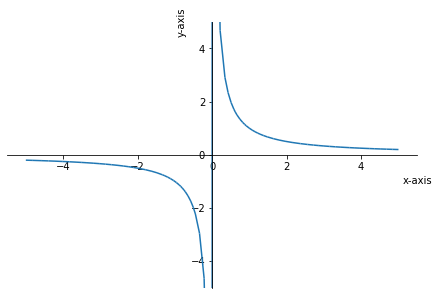

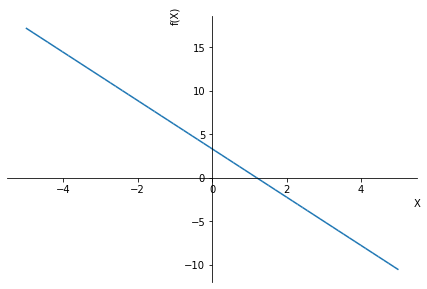

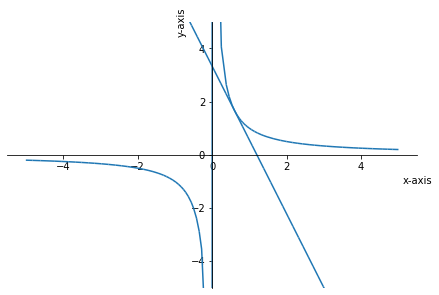

In [5]:
from sympy import Point,symbols
from sympy import sin,cos,diff
from sympy import plot_parametric,plot
t,X=symbols('t,X')

#giv in the parametric form of the curve
x=t
y=1/t
point=Point([3/5 , 5/3])
parametric_point=3/5 #At P 't' takes a value of 2

#get the slope,intercept,equation of tangent
x_prime=diff(x,t) #dx/dt
y_prime=diff(y,t) #dy/dt
slope_of_tangent=y_prime.subs(t,parametric_point)/x_prime.subs(t,parametric_point)
intercept=-1*point.x*slope_of_tangent +point.y
eqn_tangent= slope_of_tangent*X+intercept #Y=mx+c

#Plot the curve and the tangent
pcurve=plot_parametric((t,1/t),(t,-5,5),ylim=(-5,5),xlabel='x-axis',ylabel='y-axis')
ptangent=plot((eqn_tangent),(X,-5,5))
#ptangent=plot_implicit(Eq(slope_of_tangent*t+intercept,1/t),(t,-5,5))
pcurve.extend(ptangent)
pcurve.show()


1c) Prove: The three medians of a triangle(the segments from a vertex to the midpoint of the opposite side) meet at a single point,which divides the medians in the ration 2:1

In [4]:
#Proof
from sympy.vector import CoordSys3D
from sympy import symbols

#Define the coordinate sys and origin
sys=CoordSys3D('sys')
O=sys.origin

#Define the vertices of the triangle
a1,a2,a3=symbols('a1 a2 a3')
A=O.locate_new('A',a1*sys.i + a2*sys.j + a3*sys.k)
b1,b2,b3=symbols('b1 b2 b3')
B=O.locate_new('B',b1*sys.i + b2*sys.j + b3*sys.k)
c1,c2,c3=symbols('c1 c2 c3')
C=O.locate_new('C',c1*sys.i + c2*sys.j + c3*sys.k)

#Get the median vectors
#https://docs.sympy.org/latest/modules/vector/coordsys.html 
#A.position_wrt(O) returns vector  (see the below cell for ref.)
mid_point_AB = O.locate_new('mid_point_AB', A.position_wrt(O) + (B.position_wrt(A) / 2))                                                                                       
mid_point_BC = O.locate_new('mid_point_BC', B.position_wrt(O) + (C.position_wrt(B) / 2))
mid_point_CA = O.locate_new('mid_point_CA', C.position_wrt(O) + (A.position_wrt(C) / 2))

median_1 = mid_point_AB.position_wrt(C)
median_2 = mid_point_BC.position_wrt(A)
median_3 = mid_point_CA.position_wrt(B)

In [1]:
#Consider a coordinate system N . Suppose we want to define a new system M, whose origin is located at 3i+4j+5k
#from N’s origin.
from sympy.vector import CoordSys3D
N = CoordSys3D('N')
M = N.locate_new('M', 3*N.i + 4*N.j + 5*N.k)   
M.position_wrt(N)

3*N.i + 4*N.j + 5*N.k

In [2]:
N.origin.express_coordinates(M)

(-3, -4, -5)

In [5]:
#Get the intersection point

from sympy.geometry import Point, Line

#Get the median lines
line1 = Line(C.express_coordinates(sys),mid_point_AB.express_coordinates(sys))
line2 = Line(A.express_coordinates(sys),mid_point_BC.express_coordinates(sys))
line3 = Line(B.express_coordinates(sys),mid_point_CA.express_coordinates(sys))

#Get the intersection point coordinates
mp_x = line1.intersection(line2)[0][0]
mp_y = line1.intersection(line2)[0][1]
mp_z = line1.intersection(line2)[0][2]

#get the intersection point (i.e centroid of the triangle)
intersection_point = O.locate_new('intersection_point',mp_x*sys.i+mp_y*sys.j+mp_z*sys.k)

In [11]:
line1.intersection(line2)[0][1]

a2/3 + b2/3 + c2/3

In [12]:
mag1 = mid_point_BC.position_wrt(intersection_point).magnitude()
mag2 = intersection_point.position_wrt(A).magnitude()

ratio = mag1/mag2
ratio

sqrt((-a1/3 + b1/6 + c1/6)**2 + (-a2/3 + b2/6 + c2/6)**2 + (-a3/3 + b3/6 + c3/6)**2)/sqrt((-2*a1/3 + b1/3 + c1/3)**2 + (-2*a2/3 + b2/3 + c2/3)**2 + (-2*a3/3 + b3/3 + c3/3)**2)

In [13]:
ratio.subs([(a1, 3), (a2, 9),(a3,0), (b1, 2),(b2,2),(b3,0),(c1,7),(c2,9),(c3,0)])

1/2

In [16]:
line1.intersection(line2)

[Point3D(a1/3 + b1/3 + c1/3, a2/3 + b2/3 + c2/3, a3/3 + b3/3 + c3/3)]

In [17]:
intersection_point

intersection_point

q) Find the component of a in the direction of b.Make a sketch a=[3,4,0] ,b=[4,-3,2]


In [20]:
a=np.array([3,4,0])
b=np.array([4,-3,2])
comp_a_in_the_dir_b=np.dot(a,b)/np.linalg.norm(b)
comp_a_in_the_dir_b

0.0

q3) Find the area of the quadrangle 0 whose vertices are the midpoint of the sides of the quadrangle P 
with vertices A;(2 1 0) B:(5,-1,0) C:(8,2,0) D:(4,3,0) .Verify that Q is a parallelogram. 

In [25]:
from sympy.vector import CoordSys3D
sys=CoordSys3D('sys')
O=sys.origin

#define vertices of quadrangle P
A=O.locate_new('A',2*sys.i + 1*sys.j + 0*sys.k)
B=O.locate_new('B',5*sys.i + -1*sys.j + 0*sys.k)
C=O.locate_new('C',8*sys.i + 2*sys.j + 0*sys.k)
D=O.locate_new('D',4*sys.i + 3*sys.j + 0*sys.k)

#get the vertices of the quadrangle Q which are the midpoint s of P
Q1=O.locate_new('Q1',A.position_wrt(O) + (B.position_wrt(A) / 2))
Q2=O.locate_new('Q2',B.position_wrt(O) + (C.position_wrt(B) / 2))
Q3=O.locate_new('Q3',C.position_wrt(O) + (D.position_wrt(C) / 2))
Q4=O.locate_new('Q4',D.position_wrt(O) + (A.position_wrt(D) / 2))

Q2Q1=Q2.position_wrt(Q1)
Q4Q1=Q4.position_wrt(Q1)
Area_of_the_quadrangle_Q=Q2Q1.cross(Q4Q1)
Area_of_the_quadrangle_Q.magnitude()




25/4

In [26]:
#To verify its a //gram check the crossproduct of the opposite sides

Q4Q3=Q4.position_wrt(Q3)
Q4Q3.cross(Q2Q1)

0

Q4) Fluid flow:Let v be the velocity vector of a steady fluid flow.Is the flow irrotational?Incompressible?
    Find the streamlines (The paths of the particles.) V=[y,-2x,0]
    

<ipython-input-33-a7e5993e3063>:102: UserWarning: No contour levels were found within the data range.
  ax.contour(xg2,yg2,curve,linsestyle='solid',cmap='inferno')
<ipython-input-33-a7e5993e3063>:102: UserWarning: The following kwargs were not used by contour: 'linsestyle'
  ax.contour(xg2,yg2,curve,linsestyle='solid',cmap='inferno')


(-21.1, -18.9, -21.1, -18.9)

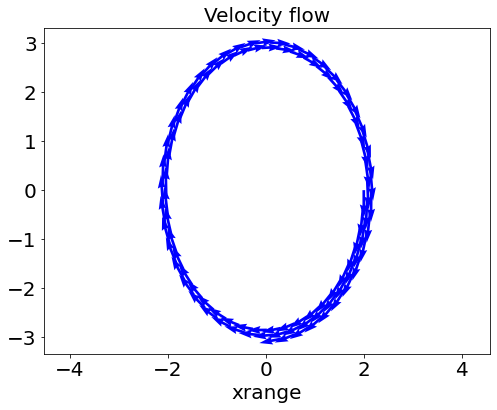

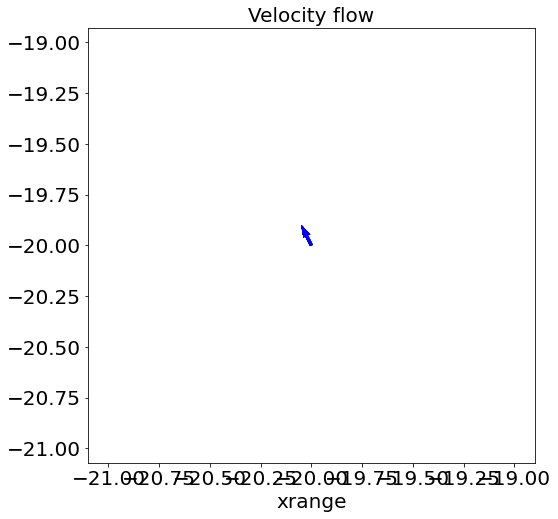

In [33]:
#To check if its incompressible => divergence should be zero
from sympy.vector import divergence,curl
velocity=sys.y*sys.i+-2*sys.x*sys.j
divergence(velocity).doit()

#To check if its irrotational => curl should be zero
curl(velocity).doit()

#Numerical soln to DE
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def ode_sys(t,XY):
    x=XY[0]
    #print(type(XY))
    y=XY[1]
    dx_dt=y
    dy_dt=-2*x
    return [dx_dt,dy_dt]

t_begin=0
t_end=10
t_nsamples=100
t_space=np.linspace(t_begin,t_end,t_nsamples)
x_init=2.
y_init=0.

method='RK45' 
num_sol=solve_ivp(ode_sys,[t_begin,t_end],[x_init,y_init],method=method,dense_output=True)
XY_num_sol=num_sol.sol(t_space)
x_num_sol=XY_num_sol[0]
y_num_sol=XY_num_sol[1]

#initialize parameters
dt=0.1
#dt=linspace(t_begin,t_end,t_nsamples)
end_time=10

alpha=2.0
beta=2.0
gamma=4.0
delta=3.0
x0=2.0
y0=0.0

def slopex(x,y):
    #fxt=alpha*x*(x0-x) -beta*x*y
    fxt=y #dx/dt
    return fxt
def slopey(x,y):
    #fyt=delta*x*y-gamma*y
    fyt=-2*x #dy/dt
    return fyt
def runge_kutta_4(dt,end_time,x0,y0):
    t=np.arange(0,end_time,dt)
    timesteps=np.size(t)
    x=np.zeros(timesteps)
    y=np.zeros(timesteps)
    x[0]=x0
    y[0]=y0
    for i in range(timesteps-1):
        k1_x=slopex(x[i],y[i])
        k1_y=slopey(x[i],y[i])
        k2_x=slopex((x[i]+k1_x*dt/2),(y[i]+k1_y*dt/2))
        k2_y=slopey((x[i]+k1_x*dt/2),(y[i]+k1_y*dt/2))
        k3_x=slopex((x[i]+k2_x*dt/2),(y[i]+k2_y*dt/2))
        k3_y=slopey((x[i]+k2_x*dt/2),(y[i]+k2_y*dt/2))
        k4_x=slopex((x[i]+k3_x*dt/2),(y[i]+k3_y*dt))
        k4_y=slopey((x[i]+k3_x*dt/2),(y[i]+k3_y*dt))
        x[i+1]=x[i]+((k1_x/2)+k2_x+k3_x+(k4_x/2))*dt/3
        y[i+1]=y[i]+((k1_y/2)+k2_y+k3_y+(k4_y/2))*dt/3
    return x,y,t

x,y,t=runge_kutta_4(dt,end_time,x0,y0)
#plt.plot(t,x)


fig=plt.figure(figsize=(8,6))
#plt.quiver(x_num_sol,y_num_sol,y_num_sol,-2*x_num_sol,color='b',angles='xy',scale_units='xy')
plt.quiver(x,y,y,-2*x,color='b',angles='xy',scale_units='xy')

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel("xrange",fontsize=20)
plt.xlabel("xrange",fontsize=20)
plt.title('Velocity flow',fontsize=20)
plt.axis('equal')



#verification by plotting the velocity allong the observed stream line
x2=y2=np.linspace(-20.,-20.,11)
xg2,yg2=np.meshgrid(x2,y2,indexing='ij',sparse=False)
curve=xg2**2+(yg2**2)/2
vx=yg2
vy=-2*xg2

#plotting the heat flow contour
fig=plt.figure(figsize=(8,8))
ax=fig.gca()
ax.quiver(xg2,yg2,vx,vy,color='b',angles='xy',scale_units='xy')
ax.contour(xg2,yg2,curve,linsestyle='solid',cmap='inferno')

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel("xrange",fontsize=20)
plt.xlabel("xrange",fontsize=20)
plt.title('Velocity flow',fontsize=20)
plt.axis('equal')


